In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='serif')

In [2]:
import phoebe
#logger = phoebe.logger('error')

In [3]:
def run_comparison_models(b):
    b.add_compute('legacy')
    b.add_compute('ellc', rv_method='flux-weighted')
    b.add_compute('jktebop')
    
    b.add_dataset('lc', compute_phases=phoebe.linspace(0,1,501))
    b.add_dataset('rv', compute_phases=phoebe.linspace(0,1,501))
    b.set_value_all('ld_mode', 'lookup')
    b.set_value_all('irrad_method', 'none')  # if not using this, then we need to use dynamical RVs for ellc
    #b.set_value_all('distortion_method', kind=['phoebe', 'ellc'], value='sphere') # to agree better with jktebop 
    
    b.set_value_all('pblum_method', 'phoebe')
    
    b.set_value_all('ld_mode', 'manual')
    
    b.run_compute(kind='phoebe', ntriangles=3000, model='phoebe2_model')
    b.run_compute(kind='legacy', model='phoebe1_model')
    b.run_compute(kind='ellc', model='ellc_model')
    b.run_compute(kind='jktebop', model='jktebop_model')
    return b

In [4]:
# detached case
b = phoebe.default_binary()
#b['period@binary'] = 10
#b.flip_constraint('mass@primary', solve_for='sma@binary')
#b['mass@primary'] = 1.0

In [5]:
b = run_comparison_models(b)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


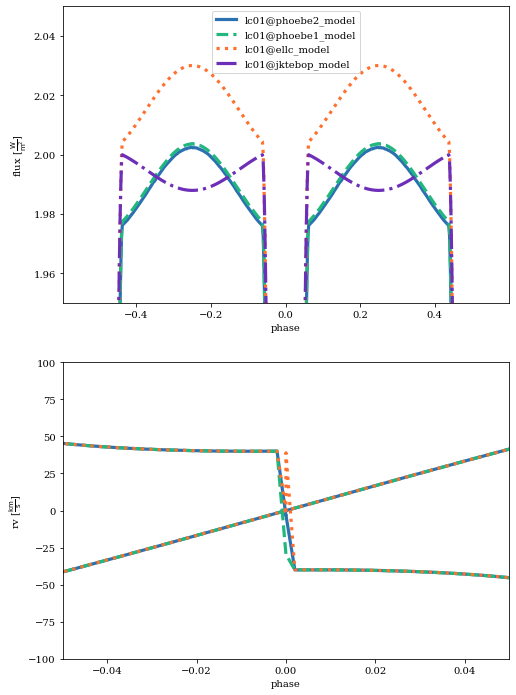

In [6]:
afig, mplfig = b.plot(x='phase', context='model',
                      ylim={'lc': (1.95,2.05), 'rv': (-100,100)}, xlim={'rv': (-0.05,0.05)},
                      model=['phoebe2_model', 'phoebe1_model'],
                      c={'phoebe2_model': 'blue', 'phoebe1_model': 'green', 'ellc_model': 'orange', 'jktebop_model': 'purple'},
                      ls={'phoebe2_model': 'solid', 'phoebe1_model': 'dashed', 'ellc_model': 'dotted', 'jktebop_model': '-.'},
                      legend={'lc': True},
                      #fig=plt.figure(figsize=(4,7)),  # causes issues when saving - labels are cutoff
                      show=True, save='figure_backends_compare.eps')

In [7]:
#afig, mplfig = b.plot(x='phase', context='model',
#                      ylim={'lc': (1.98,2.01), 'rv': (-25,25)}, xlim={'rv': (-0.05,0.05)},
#                      #model=['phoebe2_model', 'phoebe1_model'],
#                      c={'phoebe2_model': 'blue', 'phoebe1_model': 'green', 'ellc_model': 'orange', 'jktebop_model': 'purple'},
#                      ls={'phoebe2_model': 'solid', 'phoebe1_model': 'dashed', 'ellc_model': 'dotted', 'jktebop_model': '-.'},
#                      legend={'lc': True},
#                      #fig=plt.figure(figsize=(4,7)),  # causes issues when saving - labels are cutoff
#                      show=True, save='figure_backends_compare.eps')

In [8]:
# semidetached case
b = phoebe.default_binary(semidetached='primary')
# TODO: get a realistic semidetached system
b['period@binary'] = 2
b['q'] = 0.2
b['teff@primary'] = 7600
b['teff@secondary'] = 4500
b['requiv@secondary'] = 0.8
b.flip_constraint('mass@secondary', solve_for='sma@binary')
b['mass@secondary'] = 0.8

In [9]:
print(b.filter(qualifier=['mass', 'requiv', 'teff'], context='component'))

ParameterSet: 6 parameters
C        requiv@primary@component: 5.897228627156461 solRad
           teff@primary@component: 7600.0 K
C          mass@primary@component: 3.9999999999999996 solMass
       requiv@secondary@component: 0.8 solRad
         teff@secondary@component: 4500.0 K
         mass@secondary@component: 0.8 solMass


In [10]:
b = run_comparison_models(b)

ValueError: Could not compute intensities with atm='ck2004'.  Try changing atm to a table that covers a sufficient range of values (or to 'blackbody' in which case ld_mode will need to be set to 'manual' and coefficients provided via ld_coeffs).  Enable 'warning' logger to see out-of-bounds arrays.

In [ ]:
afig, mplfig = b.plot(x='phase',
                      ylim={'lc': (1.98,2.01), 'rv': (-15,15)}, xlim={'rv': (-0.05,0.05)},
                      #model=['phoebe2_model', 'phoebe1_model'],
                      c={'phoebe2_model': 'blue', 'phoebe1_model': 'green', 'ellc_model': 'orange', 'jktebop_model': 'purple'},
                      ls={'phoebe2_model': 'solid', 'phoebe1_model': 'dashed', 'ellc_model': 'dotted', 'jktebop_model': '-.'},
                      legend={'lc': True},
                      #fig=plt.figure(figsize=(4,7)),  # causes issues when saving - labels are cutoff
                      show=True, save='figure_backends_compare_semidetached.eps')